In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(r"datasets/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,4,21984.47
4,32,0,28.9,0,0,4,3866.86
...,...,...,...,...,...,...,...
145,29,1,38.8,3,0,2,5138.26
146,46,0,30.5,3,1,4,40720.55
147,51,1,37.7,1,0,2,9877.61
148,53,1,37.4,1,0,4,10959.69


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,4,21984.47
4,32,0,28.9,0,0,4,3866.86


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
145,29,1,38.8,3,0,2,5138.26
146,46,0,30.5,3,1,4,40720.55
147,51,1,37.7,1,0,2,9877.61
148,53,1,37.4,1,0,4,10959.69
149,19,0,28.4,1,0,1,1842.52


In [8]:
X=df.drop(columns=["expenses"])
y=df["expenses"]
X

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,1,1
1,18,0,33.8,1,0,2
2,28,0,33.0,3,0,2
3,33,0,22.7,0,0,4
4,32,0,28.9,0,0,4
...,...,...,...,...,...,...
145,29,1,38.8,3,0,2
146,46,0,30.5,3,1,4
147,51,1,37.7,1,0,2
148,53,1,37.4,1,0,4


In [9]:
y

0      16884.92
1       1725.55
2       4449.46
3      21984.47
4       3866.86
         ...   
145     5138.26
146    40720.55
147     9877.61
148    10959.69
149     1842.52
Name: expenses, Length: 150, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[-1.34599479, -1.0168079 ,  0.66700983, -0.89136273, -0.56451866,
        -0.51632754],
       [-1.27743818, -1.0168079 , -1.08262479, -0.07484725, -0.56451866,
        -1.40146045],
       [-1.27743818,  0.98346994, -0.29068491, -0.89136273, -0.56451866,
        -1.40146045],
       [ 1.67049608,  0.98346994, -0.76953228, -0.89136273,  1.77142063,
        -0.51632754],
       [ 0.23080726, -1.0168079 , -1.59830658, -0.07484725, -0.56451866,
        -0.51632754],
       [ 0.57359031, -1.0168079 ,  0.00399039,  1.55818371,  1.77142063,
         1.2539383 ],
       [-1.14032496,  0.98346994,  0.5749238 ,  0.74166823, -0.56451866,
         1.2539383 ],
       [ 1.19059981,  0.98346994,  0.42758615,  0.74166823, -0.56451866,
         1.2539383 ],
       [-0.38620224, -1.0168079 , -0.29068491, -0.89136273, -0.56451866,
         1.2539383 ],
       [-1.27743818,  0.98346994, -0.34593653,  3.19121468, -0.56451866,
        -1.40146045],
       [-0.24908902, -1.0168079 , -0.95370435,  0.

In [13]:
X.shape

(150, 6)

In [14]:
def ann_model(activation="relu", optimizer="adam"):
    model = keras.Sequential([
        layers.Dense(16, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(8, activation=activation),
        layers.Dense(1, activation="linear")
    ])
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model

In [15]:
activations = ["relu", "tanh", "sigmoid"]
optimizers = ["adam", "sgd"]

In [17]:
results=[]
histories={}
for activation in activations:
    for optimizer in optimizers:
        print(f"Training with Activation: {activation}, Optimizer: {optimizer}")
        model = ann_model(activation, optimizer)
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
        loss, accuracy = model.evaluate(X_test, y_test)
        results.append({
            "Activation": activation,
            "Optimizer": optimizer,
            "Accuracy": accuracy,
            "Loss": loss
        })
        histories[f"{activation}_{optimizer}"] = history.history

Training with Activation: relu, Optimizer: adam
Epoch 1/20


C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 312817056.0000 - mae: 12734.3213 - val_loss: 419182624.0000 - val_mae: 16060.3691
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 429579872.0000 - mae: 15572.6934 - val_loss: 419180160.0000 - val_mae: 16060.3066
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 359517696.0000 - mae: 13671.2471 - val_loss: 419177856.0000 - val_mae: 16060.2451
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 306720832.0000 - mae: 12475.6348 - val_loss: 419175488.0000 - val_mae: 16060.1846
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 351308704.0000 - mae: 13612.6641 - val_loss: 419172992.0000 - val_mae: 16060.1191
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 376169536.0000 - mae: 13989.8867 - val_loss: 419170368.0000 - val_mae: 16060.0498
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 362909728.0000 - mae: 13651.7158 - val_loss: 419167712.0000 - val_mae: 16059.9795
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 80110804992.0000 - mae: 139137.0781 - val_loss: 742202368.0000 - val_mae: 24102.9590
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 638115648.0000 - mae: 21467.6797 - val_loss: 665879488.0000 - val_mae: 22463.9648
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 600456064.0000 - mae: 20345.5938 - val_loss: 600681152.0000 - val_mae: 20962.6172
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 540022208.0000 - mae: 18835.1445 - val_loss: 543832896.0000 - val_mae: 19559.7324
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 452178016.0000 - mae: 17111.9180 - val_loss: 494775616.0000 - val_mae: 18262.6895
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 373647648.0000 - mae: 14896.4863 - val_loss: 452483904.0000 - val_mae: 17065.5840
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 366475680.0000 - mae: 14195.8340 - val_loss: 415749408.0000 - val_mae: 15953.0439
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 304470848.0000 - mae: 12561.7979 - val_loss: 419209216.0000 - val_mae: 16060.9248
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 285423552.0000 - mae: 12056.3760 - val_loss: 419206688.0000 - val_mae: 16060.8848
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 352973600.0000 - mae: 13288.6807 - val_loss: 419204160.0000 - val_mae: 16060.8447
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 344687968.0000 - mae: 13368.0293 - val_loss: 419201664.0000 - val_mae: 16060.8057
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 340004448.0000 - mae: 13383.0508 - val_loss: 419199200.0000 - val_mae: 16060.7656
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 333970048.0000 - mae: 13034.2139 - val_loss: 419196768.0000 - val_mae: 16060.7256
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 334854176.0000 - mae: 13259.8740 - val_loss: 419194336.0000 - val_mae: 16060.6885
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 322069376.0000 - mae: 12613.0332 - val_loss: 289419744.0000 - val_mae: 12141.1377
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 209964512.0000 - mae: 9494.3877 - val_loss: 217697984.0000 - val_mae: 10611.1855
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 168087008.0000 - mae: 8860.9014 - val_loss: 188938432.0000 - val_mae: 10054.4775
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 150595696.0000 - mae: 8644.9658 - val_loss: 176258016.0000 - val_mae: 9978.4102
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 146867456.0000 - mae: 9142.7217 - val_loss: 171614032.0000 - val_mae: 9983.6611
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 153111888.0000 - mae: 9431.4424 - val_loss: 168964112.0000 - val_mae: 9984.8711
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 137318528.0000 - mae: 8877.6104 - val_loss: 167274416.0000 - val_mae: 9977.2617
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 345661952.0000 - mae: 13706.8086 - val_loss: 419197728.0000 - val_mae: 16060.7764
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 290490240.0000 - mae: 12012.6084 - val_loss: 419196032.0000 - val_mae: 16060.7275
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 287942400.0000 - mae: 12249.0127 - val_loss: 419194464.0000 - val_mae: 16060.6768
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 329600960.0000 - mae: 13049.1182 - val_loss: 419192832.0000 - val_mae: 16060.6289
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 373063872.0000 - mae: 13868.6152 - val_loss: 419191200.0000 - val_mae: 16060.5801
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 364392576.0000 - mae: 13466.4111 - val_loss: 419189568.0000 - val_mae: 16060.5293
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 320867680.0000 - mae: 12912.3438 - val_loss: 419187936.0000 - val_mae: 16060.4814
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 324170816.0000 - mae: 12697.3936 - val_loss: 341029760.0000 - val_mae: 13493.5537
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 233384400.0000 - mae: 9828.2334 - val_loss: 282316928.0000 - val_mae: 11890.7490
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 230826512.0000 - mae: 9895.0410 - val_loss: 244772912.0000 - val_mae: 11082.3135
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 179978496.0000 - mae: 8769.8652 - val_loss: 220304064.0000 - val_mae: 10500.5459
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 164692832.0000 - mae: 8467.8262 - val_loss: 203608400.0000 - val_mae: 10093.4248
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 187508448.0000 - mae: 9525.1973 - val_loss: 193671168.0000 - val_mae: 9870.7871
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 190215472.0000 - mae: 9851.5586 - val_loss: 187702864.0000 - val_mae: 9751.0957
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

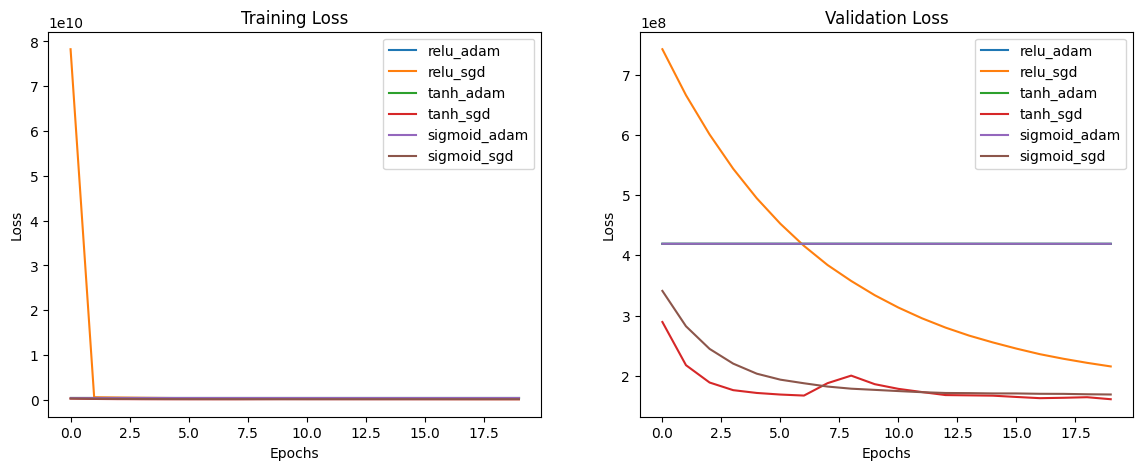

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
for key, history in histories.items():
    axes[0].plot(history["loss"], label=f"{key}")
axes[0].set_title("Training Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# Plot Validation Loss
for key, history in histories.items():
    axes[1].plot(history["val_loss"], label=f"{key}")
axes[1].set_title("Validation Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.show()